# Import Dependencies
#### created by Martin Straußberger
for Deep Learning (Image Recognition)

In [1]:
## jupyter very good for prototyping, but if you want to deploy your Image Recognition with pure python
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

from keras.datasets import mnist



## age of programming lego-box -> Keras!
## train neural network in splitted versions / idea of overfitting 
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

/home/mskeegan/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
print(train_images.shape) 
print(test_images.shape)
print(train_labels.shape)
print(test_labels.shape)

## first lines are inputs / images: 28x28 / and find a output

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [3]:
print(train_images[0])  ## these are images. 28 arrays with 28 inner lines / numbers: greyscale level pixels from 0 - 256 / coloured: 3 values (red,green,blue)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

<function matplotlib.pyplot.show(*args, **kw)>

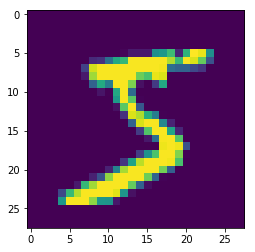

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(train_images[0])
plt.show

In [5]:
print(train_labels[0])

5


# Step 1: Network Architecture - Create Neural Network

In [6]:
from keras import models
from keras import layers

model = models.Sequential()
## relu is fast in use it almost everywhere, except optimation layers
model.add(layers.Dense(512, activation="relu", input_shape=(28 * 28,))) 
model.add(layers.Dense(10, activation="softmax"))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


Matrix: W(x)+b (b = bias)

In [7]:
model.compile(
        optimizer="rmsprop",
        loss="categorical_crossentropy",
        metrics=["accuracy"]
)

Categorical means more then 2 classes (multiply classes) use "catergorical_crossentropy".
Optimizer counts the loss and takes a algorithm that improves the output. We have now the data and we will evaluate how much the model can learn and how it could predict.

# How would you see the NN-Model is performing well in learning?


loss small as possible / accuracy high as possible (both for training and testing)

In [8]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255


## categorical encoding
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels) ##make sure after copying to change all labels for i.e. testing!!^^

print(train_labels.shape)
print(train_labels[0])
print(test_labels.shape)
print(test_labels[0])

(60000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
(10000, 10)
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In order to normalize data, normalize it only from data before NOT FROM the TEST DATA

# Let´s Do the Training!

After one epoch, the model get trained by the same dataset in this case 5 times!

batch_size = Put in several images in one ground / 1. batching because parallelizing processes / 2. power of two because of the computer architecture

In [9]:
x_val = train_images[:10000]
partial_train_images = train_images[10000:]

y_val = train_labels[:10000]
partial_train_labels = train_labels[10000:]

print(x_val.shape, partial_train_images.shape, train_images.shape)
print(y_val.shape, partial_train_labels.shape, train_labels.shape)

(10000, 784) (50000, 784) (60000, 784)
(10000, 10) (50000, 10) (60000, 10)


In [17]:
history = model.fit(
    train_images, train_labels,
    epochs=15,
    batch_size=512

)

Epoch 1/15
60000/60000 [==============================] - 6s 93us/step - loss: 0.0882 - acc: 0.9746
Epoch 2/15
60000/60000 [==============================] - 5s 77us/step - loss: 0.0686 - acc: 0.9801
Epoch 3/15
60000/60000 [==============================] - 5s 81us/step - loss: 0.0543 - acc: 0.9842
Epoch 4/15
60000/60000 [==============================] - 5s 79us/step - loss: 0.0442 - acc: 0.9874
Epoch 5/15
60000/60000 [==============================] - 5s 86us/step - loss: 0.0360 - acc: 0.9898
Epoch 6/15
60000/60000 [==============================] - 5s 83us/step - loss: 0.0295 - acc: 0.9923
Epoch 7/15
60000/60000 [==============================] - 5s 85us/step - loss: 0.0235 - acc: 0.9940
Epoch 8/15
60000/60000 [==============================] - 5s 84us/step - loss: 0.0194 - acc: 0.9952
Epoch 9/15
60000/60000 [==============================] - 5s 87us/step - loss: 0.0159 - acc: 0.9961
Epoch 10/15
60000/60000 [==============================] - 5s 90us/step - loss: 0.0129 - acc: 0.9969

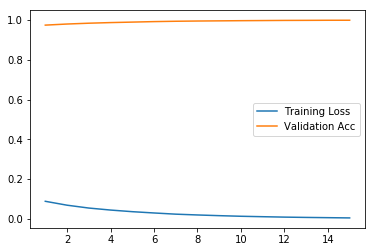

In [22]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["acc"]
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, label="Training Loss")
plt.plot(epochs, val_loss_values, label = "Validation Acc")
plt.legend()
plt.show()

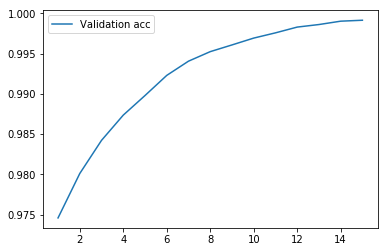

In [24]:
plt.clf()

acc_values = history_dict["acc"]
val_acc_values = history_dict["acc"]
epochs = range(1, len(loss_values) + 1)

# plt.plot(epochs, acc_values, label="Training acc")
plt.plot(epochs, val_acc_values, label = "Validation acc")
plt.legend()
plt.show()

# With every Epoch is less information the Network could learn from!
Accuracy goes up with every Epoch
Based on training data, but do not know how good that this NN is good in real life based problem. That´s the reason why a 98% accuracy isn´t at the moment telling us anything

In [25]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(test_loss, test_accuracy)

10000/10000 [==============================] - 1s 86us/step
0.06945093511724262 0.9803


Model is currently not worth anything - have to reshape it for make it usable for mobile phone (App)


# - First Training and Learning finished -

------------------

# Export the Model 

In [26]:
model.save("model.h5")

-------------

In [30]:
# probability distribution -> prediction

import numpy as np
# sample = np.random.random(1,784) ## 1 means how many sample you predict in the same time / 784 = 28*28

## takes first image and reshapes it and do the prediction
sample = test_images[0].reshape((1, 28*28)) 
prediction = model.predict(sample)
 
print(prediction)
print(np.argmax(prediction))
print(np.argmax(test_labels[0]))

[[7.8701774e-09 9.9960882e-12 3.3841917e-07 3.0368528e-05 7.7668002e-14
  4.4801753e-11 3.1836102e-15 9.9996912e-01 1.6748883e-08 7.5428687e-08]]
7
7
